# Carregando, limpando e analisando os dados

In [1]:
import trab03_utils as util
#high house price data set
ds_hhprice = util.getDSPriceHousing_ClassProb()
ds_hhprice.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Address,high_price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37...",False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,"188 Johnson Views Suite 079\r\nLake Kathleen, ...",True
2,61287.067179,5.865890,8.512727,5.13,36882.159400,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064...",False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,USS Barnett\r\nFPO AP 44820,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,USNS Raymond\r\nFPO AE 09386,False


In [2]:
ds_hhprice.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039
std,10657.991214,0.991456,1.005833,1.234137,9925.650114
min,17796.631190,2.644304,3.236194,2.000000,172.610686
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769
max,107701.748378,9.519088,10.759588,6.500000,69621.713378


In [3]:
ds_hhprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Address                       5000 non-null   object 
 6   high_price                    5000 non-null   bool   
dtypes: bool(1), float64(5), object(1)
memory usage: 239.4+ KB


In [4]:
ds_hhprice.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,high_price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.472206
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.325657
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.243635
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.127658
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.302809
high_price,0.472206,0.325657,0.243635,0.127658,0.302809,1.000000


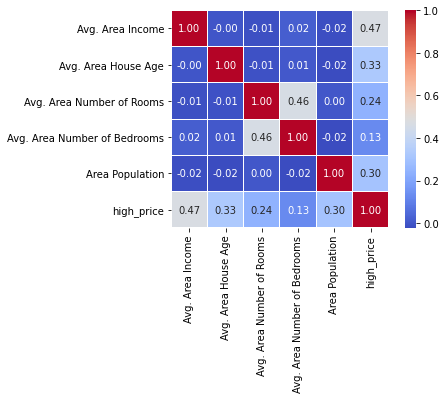

In [5]:
util.getCorrHeatMap(ds_hhprice);

In [6]:
#drop address
ds_hhprice_clean = ds_hhprice.drop('Address', axis=1)
ds_hhprice_clean

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,high_price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,False
1,79248.642455,6.002900,6.730821,3.09,40173.072174,True
2,61287.067179,5.865890,8.512727,5.13,36882.159400,False
3,63345.240046,7.188236,5.586729,3.26,34310.242831,False
4,59982.197226,5.040555,7.839388,4.23,26354.109472,False
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,False
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,True
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,False
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,False


# Implementando o modelo de classificação usando o SVM

In [7]:
from sklearn.model_selection import train_test_split
X = ds_hhprice_clean.drop('high_price', axis=1) #independent variables
y = ds_hhprice_clean['high_price'] #dependent variable

#splitting the dataset
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=1102)

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 3428 to 1581
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              4000 non-null   float64
 1   Avg. Area House Age           4000 non-null   float64
 2   Avg. Area Number of Rooms     4000 non-null   float64
 3   Avg. Area Number of Bedrooms  4000 non-null   float64
 4   Area Population               4000 non-null   float64
dtypes: float64(5)
memory usage: 187.5 KB


In [8]:
X_valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1493 to 1962
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              1000 non-null   float64
 1   Avg. Area House Age           1000 non-null   float64
 2   Avg. Area Number of Rooms     1000 non-null   float64
 3   Avg. Area Number of Bedrooms  1000 non-null   float64
 4   Area Population               1000 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


# Testando o modelo com o cross-validation usando a métrica F1 Score

In [9]:
from sklearn import svm
clf = svm.SVC()
model = clf.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
valid_results = cross_val_score(model, X=X_valid, y=y_valid, scoring='f1', cv=10)
valid_results

array([0.61904762, 0.68292683, 0.61904762, 0.41860465, 0.58536585,
       0.72340426, 0.68181818, 0.60465116, 0.625     , 0.5       ])

In [10]:
valid_results.mean()

0.6059866172112887

# Gerando a Matriz de Confusão

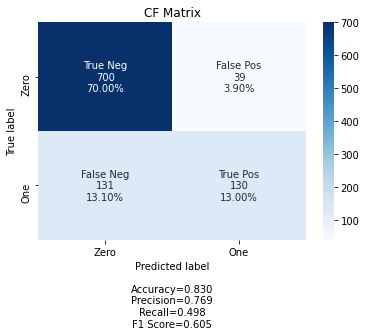

In [11]:
from sklearn.metrics import confusion_matrix
import autoML

cf_matrix = confusion_matrix(y_valid, model.predict(X_valid))

autoML.getConfusionMatrixHeatMap(cf_matrix);

# Encapsulando a "receita de bolo" em uma classe AutoML

In [12]:
automl_house = autoML.AutoML(ds_hhprice, 'high_price')
automl_house.setAlgorithm(svm.SVC())
dfResults = automl_house.getResults()
dfResults

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.046101,202.769531,0.822167,0.910,0.970685,"[[701, 38], [47, 214]]"
1,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,1.047773,214.703125,0.812659,0.908,0.968161,"[[700, 39], [48, 213]]"
2,SVC,"(Avg. Area Income, Avg. Area House Age, Area P...",3,1.343617,215.601562,0.766522,0.887,0.934735,"[[711, 28], [84, 177]]"
3,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.140099,215.839844,0.763477,0.883,0.944404,"[[704, 35], [70, 191]]"
4,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",3,1.348071,215.800781,0.683621,0.856,0.897756,"[[691, 48], [93, 168]]"
5,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.191685,213.785156,0.683503,0.855,0.913215,"[[692, 47], [94, 167]]"
6,SVC,"(Avg. Area Income, Avg. Area Number of Rooms, ...",3,1.510707,215.203125,0.657386,0.845,0.884980,"[[698, 41], [110, 151]]"
7,SVC,"(Avg. Area Income, Avg. Area Number of Rooms, ...",4,1.275014,214.789062,0.649855,0.839,0.898968,"[[695, 44], [106, 155]]"
8,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",3,1.381289,213.957031,0.631741,0.842,0.876569,"[[695, 44], [117, 144]]"
9,SVC,"(Avg. Area Income, Avg. Area Number of Bedroom...",3,1.427233,224.984375,0.622211,0.832,0.869264,"[[708, 31], [129, 132]]"


In [13]:
dfResults.describe()

,train_time,mem_max,f1,accuracy,roc_auc
count,16.000000,16.000000,16.000000,16.000000,16.000000
mean,1.356031,220.592529,0.567143,0.828563,0.851789
std,0.181769,9.098361,0.212496,0.055314,0.098610
min,1.046101,202.769531,0.175924,0.745000,0.653875
25%,1.254181,214.767578,0.404350,0.770000,0.779065
50%,1.375656,215.820312,0.640798,0.840500,0.880774
75%,1.446114,227.549805,0.703585,0.862750,0.918595
max,1.714022,235.800781,0.822167,0.910000,0.970685


In [14]:
automl_house.getBestResult()

algorithm                                                         SVC
features            (Avg. Area Income, Avg. Area House Age, Avg. A...
n_features                                                          4
train_time                                                   1.046101
mem_max                                                    202.769531
f1                                                           0.822167
accuracy                                                         0.91
roc_auc                                                      0.970685
confusion_matrix                               [[701, 38], [47, 214]]
Name: 0, dtype: object

In [15]:
automl_house.getBestResult()['features']

('Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Area Population')

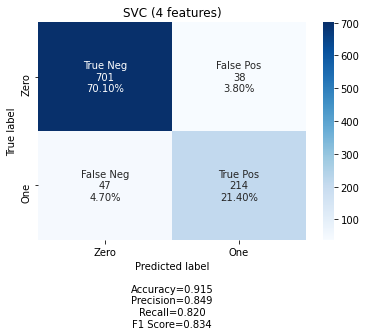

In [16]:
automl_house.getBestConfusionMatrix()

In [17]:
automl_house.processAllFeatureCombinations()
dfResults_all = automl_house.getResults()
dfResults_all

,algorithm,features,n_features,train_time,mem_max,f1,accuracy,roc_auc,confusion_matrix
0,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.148504,203.890625,0.822167,0.910,0.970685,"[[701, 38], [47, 214]]"
1,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",5,1.147617,214.980469,0.812659,0.908,0.968161,"[[700, 39], [48, 213]]"
2,SVC,"(Avg. Area Income, Avg. Area House Age, Area P...",3,1.530204,214.546875,0.766522,0.887,0.934735,"[[711, 28], [84, 177]]"
3,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.122419,215.214844,0.763477,0.883,0.944404,"[[704, 35], [70, 191]]"
4,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",3,1.515323,212.667969,0.683621,0.856,0.897756,"[[691, 48], [93, 168]]"
5,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",4,1.259596,215.324219,0.683503,0.855,0.913215,"[[692, 47], [94, 167]]"
6,SVC,"(Avg. Area Income, Avg. Area Number of Rooms, ...",3,1.352531,216.113281,0.657386,0.845,0.884980,"[[698, 41], [110, 151]]"
7,SVC,"(Avg. Area Income, Avg. Area Number of Rooms, ...",4,1.298336,216.589844,0.649855,0.839,0.898968,"[[695, 44], [106, 155]]"
8,SVC,"(Avg. Area Income, Avg. Area House Age)",2,1.473638,226.621094,0.647100,0.848,0.842198,"[[704, 35], [118, 143]]"
9,SVC,"(Avg. Area Income, Avg. Area House Age, Avg. A...",3,1.368884,217.101562,0.631741,0.842,0.876569,"[[695, 44], [117, 144]]"


In [18]:
automl_house.getBestResult()

algorithm                                                         SVC
features            (Avg. Area Income, Avg. Area House Age, Avg. A...
n_features                                                          4
train_time                                                   1.148504
mem_max                                                    203.890625
f1                                                           0.822167
accuracy                                                         0.91
roc_auc                                                      0.970685
confusion_matrix                               [[701, 38], [47, 214]]
Name: 0, dtype: object

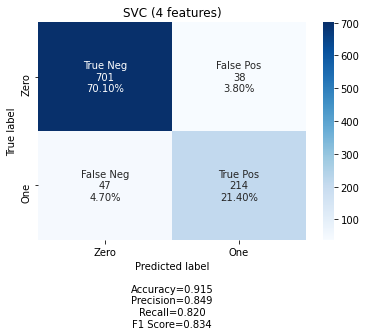

In [19]:
automl_house.getBestConfusionMatrix()

In [20]:
dfResults_all.describe()

,train_time,mem_max,f1,accuracy,roc_auc
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.539572,227.628906,0.429343,0.799065,0.769057
std,0.303017,10.626003,0.259210,0.055705,0.134175
min,1.122419,203.890625,0.000000,0.734000,0.507012
25%,1.354546,216.767578,0.195806,0.748000,0.654836
50%,1.510070,228.281250,0.474743,0.790000,0.783512
75%,1.658191,236.826172,0.648478,0.843500,0.880774
max,2.527485,242.531250,0.822167,0.910000,0.970685


In [21]:
import pandas as pd
dfResults_all.rename(columns={'train_time':'train_time_all','mem_max':'mem_max_all'
                              ,'f1':'f1_all','accuracy':'accuracy_all', 'roc_auc':'roc_auc_all'}, inplace=True)
pd.concat([dfResults.reset_index().drop('index', axis=1)
           , dfResults_all.reset_index().drop('index', axis=1)], axis=1).describe()

,train_time,mem_max,f1,accuracy,roc_auc,train_time_all,mem_max_all,f1_all,accuracy_all,roc_auc_all
count,16.000000,16.000000,16.000000,16.000000,16.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,1.356031,220.592529,0.567143,0.828563,0.851789,1.539572,227.628906,0.429343,0.799065,0.769057
std,0.181769,9.098361,0.212496,0.055314,0.098610,0.303017,10.626003,0.259210,0.055705,0.134175
min,1.046101,202.769531,0.175924,0.745000,0.653875,1.122419,203.890625,0.000000,0.734000,0.507012
25%,1.254181,214.767578,0.404350,0.770000,0.779065,1.354546,216.767578,0.195806,0.748000,0.654836
50%,1.375656,215.820312,0.640798,0.840500,0.880774,1.510070,228.281250,0.474743,0.790000,0.783512
75%,1.446114,227.549805,0.703585,0.862750,0.918595,1.658191,236.826172,0.648478,0.843500,0.880774
max,1.714022,235.800781,0.822167,0.910000,0.970685,2.527485,242.531250,0.822167,0.910000,0.970685


In [22]:
dfGroupBy_features = dfResults_all.groupby('n_features').mean()
dfGroupBy_features

,train_time_all,mem_max_all,f1_all,accuracy_all,roc_auc_all
n_features,,,,,
1,1.894062,234.702344,0.188435,0.7516,0.602301
2,1.596549,234.378516,0.329318,0.7756,0.720065
3,1.480108,224.505859,0.496270,0.8098,0.814968
4,1.268449,215.832031,0.659787,0.8502,0.902157
5,1.147617,214.980469,0.812659,0.9080,0.968161


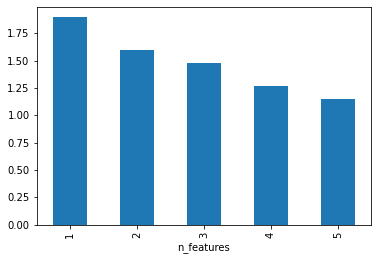

In [23]:
dfGroupBy_features['train_time_all'].plot.bar();

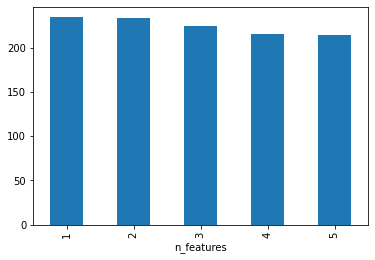

In [24]:
dfGroupBy_features['mem_max_all'].plot.bar();

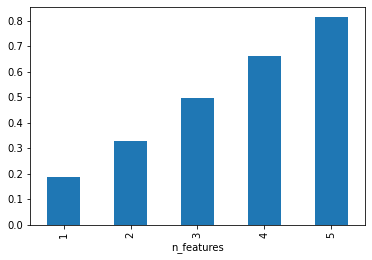

In [25]:
dfGroupBy_features['f1_all'].plot.bar();

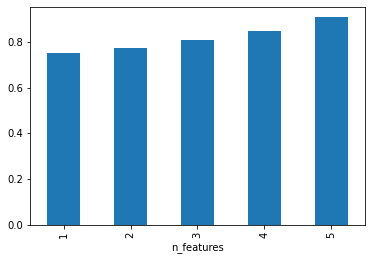

In [26]:
dfGroupBy_features['accuracy_all'].plot.bar();

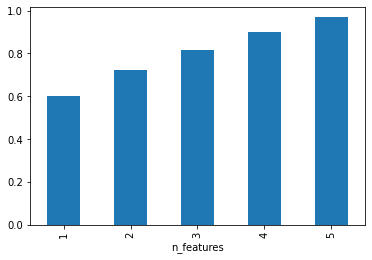

In [27]:
dfGroupBy_features['roc_auc_all'].plot.bar();